In [2]:
import torch
from dataset import PascalVOCDataset
from torch.utils.data import DataLoader
import utils.image_utils as image_utils
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
voc_dataset = PascalVOCDataset(root="./data", image_set="val", download=False)
dataloader = DataLoader(voc_dataset, batch_size=16, shuffle=False)
model = torch.load("model_weights/model.pth")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


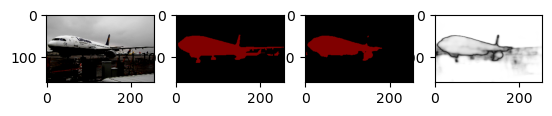

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


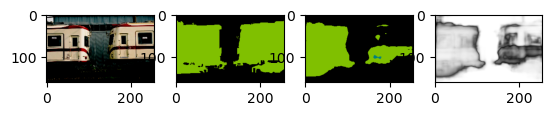

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


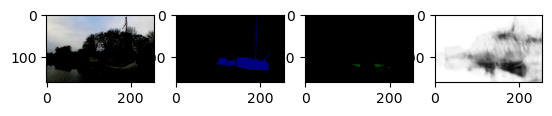

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


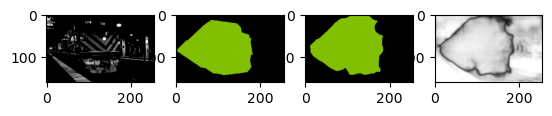

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


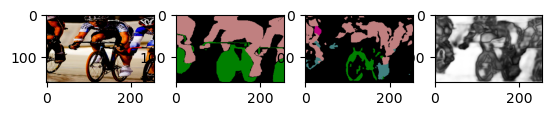

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


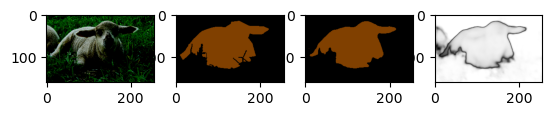

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


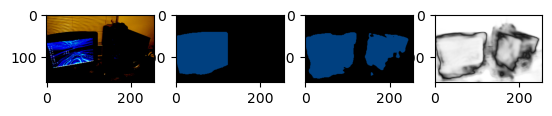

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


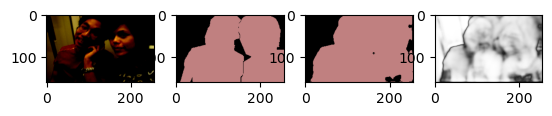

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


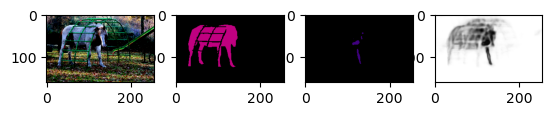

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


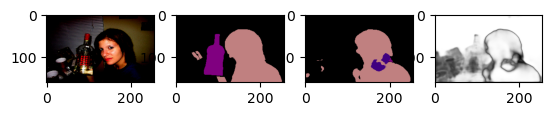

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


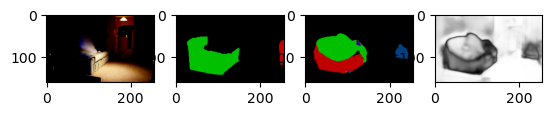

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


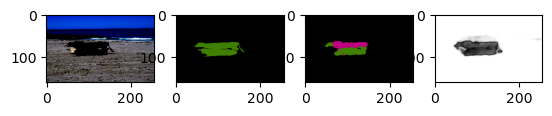

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


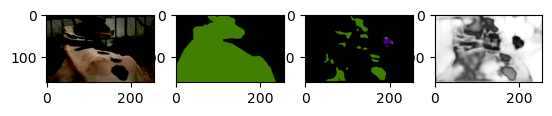

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


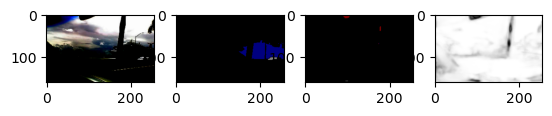

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


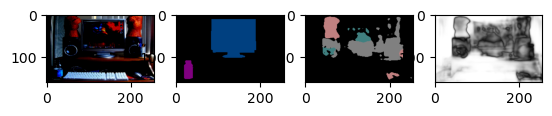

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


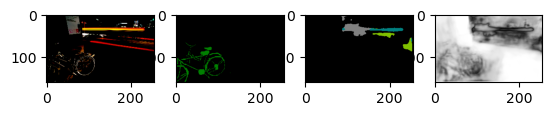

In [21]:
image_count = 0
with torch.no_grad():
    for images, masks in dataloader:
        images = images.to("cuda")
        pred_masks = model(images)
        images, pred_masks = images.to("cpu"), pred_masks.to("cpu")
        for i in range(images.size(0)):
            image, mask, pred_mask = images[i, ...], masks[i, ...], pred_masks[i, ...]
            image = torch.permute(image, dims=(1, 2, 0))
            mask_image = image_utils.segmentation_to_image(mask, segmentation_axis=0)
            pred_mask_image = image_utils.segmentation_to_image(pred_mask, segmentation_axis=0)
            uncertainty_image = torch.max(torch.softmax(pred_mask, dim=0), dim=0).values
            f, axarr = plt.subplots(1, 4)
            axarr[0].imshow(image, vmin=0, vmax=1)
            axarr[1].imshow(mask_image)
            axarr[2].imshow(pred_mask_image)
            axarr[3].imshow(uncertainty_image, cmap="gray")
            plt.show()
            pred_mask_image = Image.fromarray(pred_mask_image, "RGB")
            pred_mask_image.save(f"prediction_image/{image_count}.jpg")
            image_count += 1